# Milestone 3: AirBnB Barcelona

For this Milestone, I will be working with 2 datasets downloaded from https://insideairbnb.com/get-the-data/:

- Barcelona, Catalonia, Spain. 12 December, 2024
- Barcelona, Catalonia, Spain. 20 March, 2024

I aim to compare them, and inquire if there has been an increment of rentals and prices over time.

## Notebook contents

1. Exploratory analysis of the datasets
2. Increment in the number of listings over time
3. Geopraphic distribution of listings over time

## 1. Exploratory analysis of the datasets

### A. Importing datasets & understanding their structure

In [165]:
# Import libraries to be used

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
# Import datasets

data_dec = pd.read_csv("/Users/maria/Documents/CodeOP/02_GitHub/Assigments/MODULE-3/milestone_3/data/listings_BCN_Dec_24.csv")
data_mar = pd.read_csv("/Users/maria/Documents/CodeOP/02_GitHub/Assigments/MODULE-3/milestone_3/data/listings_BCN_Mar_24.csv")


In order to use both datasets, we'll check if they have the same attributes.

In [167]:
# Visualizing dataset structure
pd.set_option('display.max_columns', None)  # Show all columns
data_dec.head()


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18674,https://www.airbnb.com/rooms/18674,20241212051318,2024-12-12,city scrape,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,https://www.airbnb.com/users/show/71615,Mireia Maria,2010-01-19,"Barcelona, Spain","We are Mireia (47) & Maria (49), two multiling...",within an hour,99%,89%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,la Sagrada Família,46.0,50.0,"['email', 'phone']",t,t,"Barcelona, CT, Spain",la Sagrada Família,Eixample,41.405560,2.17262,Entire rental unit,Entire home/apt,8,2.0,2 baths,3.0,6.0,"[""Refrigerator"", ""30 inch TV"", ""Free street pa...",$119.00,1,1125,1,5,1125,1125,3.4,1125.0,NaN,t,2,10,10,10,2024-12-12,45,5,0,2013-05-27,2024-09-16,4.39,4.48,4.59,4.73,4.70,4.80,4.32,HUTB-002062,t,29,29,0,0,0.32
1,23197,https://www.airbnb.com/rooms/23197,20241212051318,2024-12-12,city scrape,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",Beautiful and Spacious Apartment with Large Te...,"Strategically located in the Parc del Fòrum, a...",https://a0.muscache.com/pictures/miso/Hosting-...,90417,https://www.airbnb.com/users/show/90417,Etain (Marnie),2010-03-09,"Catalonia, Spain","Hi there, \nI'm marnie from Australia, though ...",within an hour,100%,93%,t,https://a0.muscache.com/im/pictures/user/44b56...,https://a0.muscache.com/im/pictures/user/44b56...,El Besòs i el Maresme,6.0,13.0,"['email', 'phone']",t,t,"Sant Adria de Besos, Barcelona, Spain",el Besòs i el Maresme,Sant Martí,41.412432,2.21975,Entire rental unit,Entire home/apt,5,2.0,2 baths,3.0,4.0,"[""Refrigerator"", ""Bed linens"", ""Freezer"", ""Fre...",$219.00,3,32,3,7,1125,1125,3.6,1125.0,NaN,t,17,41,71,236,2024-12-12,81,7,0,2011-03-15,2024-10-24,4.80,4.94,4.90,4.94,4.99,4.63,4.65,HUTB005057,f,1,1,0,0,0.48
2,32711,https://www.airbnb.com/rooms/32711,20241212051318,2024-12-12,city scrape,Sagrada Familia area - Còrsega 1,A lovely two bedroom apartment only 250 m from...,What's nearby <br />This apartment is located...,https://a0.muscache.com/pictures/357b25e4-f414...,135703,https://www.airbnb.com/users/show/135703,Nick,2010-05-31,"Barcelona, Spain",I'm Nick your English host in Barcelona.\r\n\r...,within an hour,100%,99%,f,https://a0.muscache.com/im/users/135703/profil...,https://a0.muscache.com/im/users/135703/profil...,Camp d'en Grassot i Gràcia Nova,3.0,15.0,"['email', 'phone', 'work_email']",t,t,"Barcelona, Catalonia, Spain",el Camp d'en Grassot i Gràcia Nova,Gràcia,41.405660,2.17015,Entire rental unit,Entire home/apt,6,1.5,1.5 baths,2.0,3.0,"[""Re

In [168]:
data_mar.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,360863,https://www.airbnb.com/rooms/360863,20240320024717,2024-03-20,previous scrape,SPECIAL OFFER @ COSY AND CHARMING,Fully furnished and renovated apartment in the...,The Barceloneta is a triangular spit of land t...,https://a0.muscache.com/pictures/4378248/3e40f...,1824328,https://www.airbnb.com/users/show/1824328,Umberto,2012-02-28,"Barcelona, Spain",I am passionate about traveling and discoverin...,NaN,NaN,57%,t,https://a0.muscache.com/im/users/1824328/profi...,https://a0.muscache.com/im/users/1824328/profi...,La Barceloneta,2.0,4.0,"['email', 'phone']",t,f,"Barcelona, Catalonia, Spain",la Barceloneta,Ciutat Vella,41.384280,2.195760,Private room in rental unit,Private room,2,NaN,1 private bath,NaN,NaN,"[""Cleaning available during stay"", ""Baking she...",NaN,31,150,31,31,150,150,31.0,150.0,NaN,NaN,0,0,0,0,2024-03-20,32,0,0,2012-04-13,2015-10-21,4.73,4.84,4.84,4.91,4.94,4.71,4.74,NaN,f,2,1,1,0,0.22
1,17475,https://www.airbnb.com/rooms/17475,20240320024717,2024-03-20,city scrape,Attic Sagrada Familia,Beautiful attic apartment <br />with large ter...,NaN,https://a0.muscache.com/pictures/f6e6718f-dba0...,65623,https://www.airbnb.com/users/show/65623,Luca,2009-12-25,"Rome, Italy",Italian.,within a few hours,100%,82%,f,https://a0.muscache.com/im/pictures/user/989d6...,https://a0.muscache.com/im/pictures/user/989d6...,Dreta de l'Eixample,2.0,6.0,"['email', 'phone']",t,t,NaN,la Dreta de l'Eixample,Eixample,41.399390,2.170440,Entire rental unit,Entire home/apt,3,1.0,1 bath,1.0,1.0,"[""Microwave"", ""Outdoor dining area"", ""Private ...",$165.00,3,90,3,3,90,90,3.0,90.0,NaN,t,0,0,0,7,2024-03-20,29,12,1,2010-07-10,2024-03-01,4.48,4.73,4.23,4.82,4.73,4.82,4.50,NaN,f,1,1,0,0,0.17
2,18674,https://www.airbnb.com/rooms/18674,20240320024717,2024-03-20,city scrape,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,https://www.airbnb.com/users/show/71615,Mireia Maria,2010-01-19,"Barcelona, Spain","We are Mireia (47) & Maria (49), two multiling...",within an hour,97%,85%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,la Sagrada Família,44.0,46.0,"['email', 'phone']",t,t,"Barcelona, CT, Spain",la Sagrada Família,Eixample,41.405560,2.172620,Entire rental unit,Entire home/apt,8,2.0,2 baths,3.0,6.0,"[""Paid parking on premises"", ""Private patio or...",$210.00,1,1125,1,4,1125,1125,2.9,1125.0,NaN,t,18,41,63,252,2024-03-20,40,6,0,2013-05-27,2023-11-07,4.33,4.44,4.62,4.74,4.67,4.77,4.28,HUTB-002062,t,28,28,0,0,0.30
3,97529,https://www.airbnb.c

In [169]:
# Let's check the numer of rows and colums of both datasets to get and idea of how big they are
print(f"data_dec:", data_dec.shape)
print(f"data_mar:", data_mar.shape)


data_dec: (19455, 75)
data_mar: (18519, 75)


Both datasets present the same number of columns. 
There are more rows in December, which this means an increase in the number of apparments announced over time.

In [170]:
# Now let's check if the columns are exactly the same.

data_dec.columns == data_mar.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

Since the columns are all the same, let's keep the basic EDA only with the "data_dec" for the moment.

In [171]:
# Checking columns variable type
pd.set_option('display.max_rows', None)  # Show all rows
data_dec.dtypes.sort_values(ascending=False)

host_thumbnail_url                               object
amenities                                        object
host_neighbourhood                               object
has_availability                                 object
host_verifications                               object
host_has_profile_pic                             object
host_identity_verified                           object
neighbourhood                                    object
neighbourhood_cleansed                           object
neighbourhood_group_cleansed                     object
calendar_last_scraped                            object
first_review                                     object
property_type                                    object
room_type                                        object
last_review                                      object
price                                            object
bathrooms_text                                   object
host_picture_url                                

We can see different types of variables:

a) **object** (=string). This includes **categorical features** (ex: amenities, neighbourhood), **links** (ex: host_url, picture_url), **text** (ex: last_review, name), **bool** (as t = TRUE and f = FALSE, ex: host_is_superhost), **price** & **dates** (ex: calendar_last_scraped, host_since)

b) **float64** (=float). This inclues **ratings** (ex: review_scores_location), **counts** (ex: host_listings_count, minimum_nights_avg_ntm, bathrooms) or **location** (ex: latitude, longitude).

c) **int64** (=integer). This includes **counts** (ex: maximum_nights, number_of_reviews, accommodates, calculated_host_listings_count_private_rooms) and **ids** (ex: host_id, id, scrape_id).

In [172]:
# Are there any Null values?
pd.set_option('display.max_rows', None)  # Show all rows
data_dec.isnull().sum().sort_values(ascending=False)

calendar_updated                                19455
host_neighbourhood                               9811
neighborhood_overview                            9664
neighbourhood                                    9664
host_about                                       7214
license                                          6253
review_scores_checkin                            4994
review_scores_value                              4993
review_scores_location                           4993
review_scores_accuracy                           4993
review_scores_cleanliness                        4992
review_scores_communication                      4991
reviews_per_month                                4990
last_review                                      4990
first_review                                     4990
review_scores_rating                             4990
host_location                                    4396
beds                                             3847
bathrooms                   

There are many columns with Null values, we'll have to take this into account for later analysis.

In [269]:
# Are there any duplicate rows?
print(f"duplicates in data_dec:", data_dec.duplicated().sum())
print(f"duplicates in data_mar:", data_mar.duplicated().sum())

duplicates in data_dec: 0
duplicates in data_mar: 0


We don't need to worry about duplicate rows in any of the datasets.

## 2. Increment in the number of listings over time

**Aim**

To check if there are any changes in the amount of listings over time.

**Hypothesis**

There is a higher amount of listings in December 2024 compared to March 2024.

In [ ]:
# Let's see the change in number of listings over time.
# To do so, we will look for difference of unique id that between December and March.

total_mar = data_mar["id"].nunique()
total_dec = data_dec["id"].nunique()

print(f"Total Listings in March: {total_mar}")
print(f"Total Listings in December: {total_dec}")
print(f"Increase in Listings: {total_dec - total_mar}")

Total Listings in March: 18519
Total Listings in December: 19455
Increase in Listings: 936


## 3. Geopraphic distribution of listings over time

**Aim**

To check wether there is an homogeneous or heterogeneous distribution of the listings in each neighbourhood.

**Hypothesis**

There is a higher amount of listings in the neighbourhoods that are close to the city center.

In [ ]:
# Which neighbourhoods are listed in the dataset?
data_mar["neighbourhood"].value_counts().sort_index(ascending=False)

neighbourhood
Барселона, Каталония, Spain                        2
Барселона, Barcelona, Spain                        2
barcelona, Barcelona, Spain                        2
barcelona , barcelona, Spain                       1
Spain                                              2
Sant Adrià de Besòs, Spain                         1
Sant Adrià de Besòs, Catalunya, Spain              5
Sant Adrià de Besòs, Catalonia, Spain              1
Sant Adrià De Besòs, Catalunya, Spain              1
Sant Adria de Besos, Barcelona, Spain              1
Sagrada Familia, Barcelona, Catalonia, Spain       1
L'Hospitalet de Llobregat, Catalunya, Spain        7
Gràcia, Barcelona, Spain                           1
Gracia-Barcelona, Spain                            1
Gotico, Barcelona, Catalonia, Spain                2
El Masnou, Catalonia, Spain                        1
Eixample, Barcelona, Spain                         3
Ciutat Vella, Catalunya, Spain                     1
Catalunya , Spain               

We can see that manual introduction of neighbourhoods by the hosts leads to cahotic cathegorization in the dataset. Cleary, this column needs to be cleaned.

In [ ]:
# We are lucky, and the neighbourhood information has already been cleaned and saved as "neighbourhood_group_cleansed"

data_mar["neighbourhood_group_cleansed"].value_counts().sort_index(ascending=False)

neighbourhood_group_cleansed
Sarrià-Sant Gervasi     974
Sants-Montjuïc         1933
Sant Martí             1684
Sant Andreu             288
Nou Barris              206
Les Corts               379
Horta-Guinardó          529
Gràcia                 1556
Eixample               6704
Ciutat Vella           4266
Name: count, dtype: int64

By using the "neighbourhood_group_cleansed", we can study the geographical distribution of the listings in each timepoint.

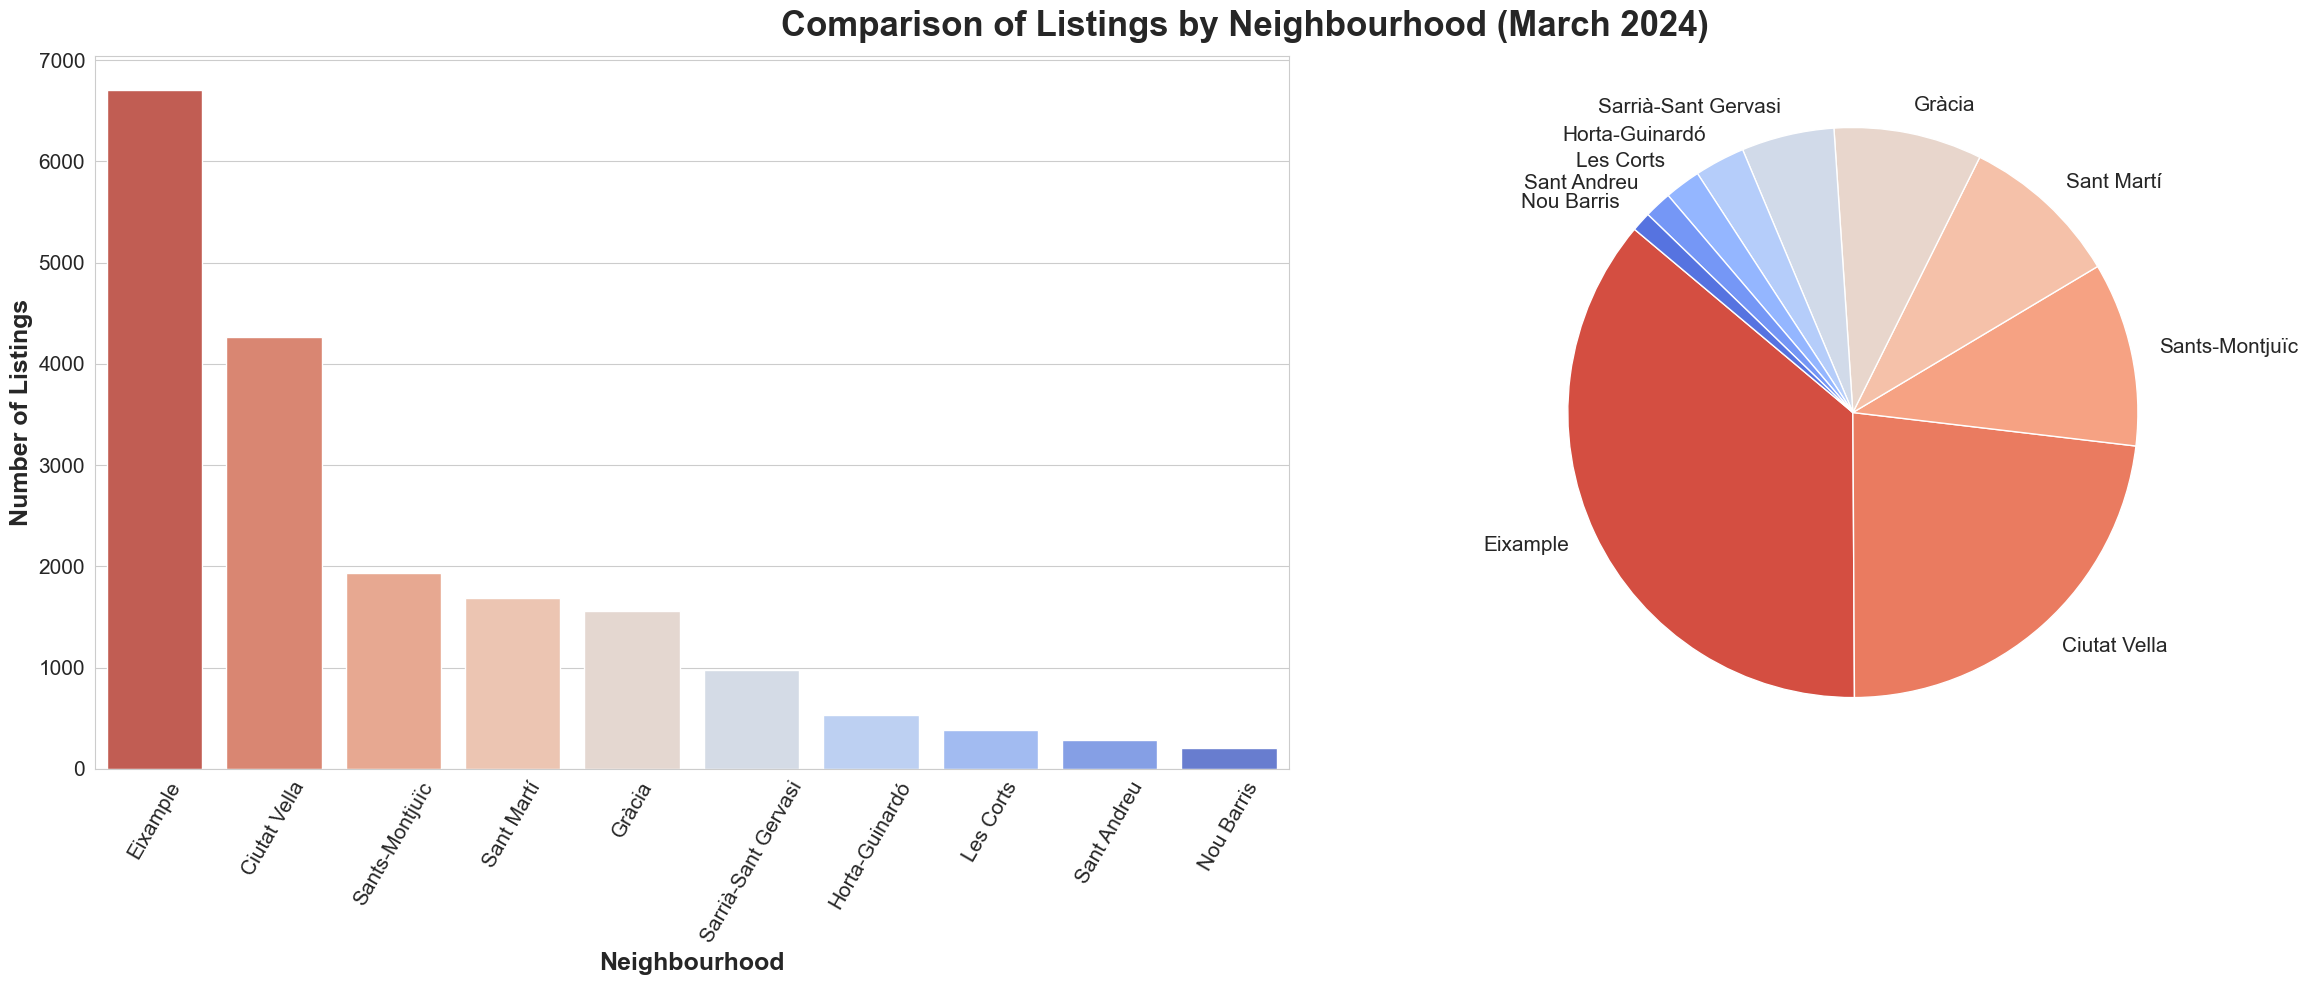

In [ ]:
# Let's see the distribution of the listings in March
# We'll draw both a barchart (to see total counts) and a piechart (too see the proportions)

# Count listings per neighborhood in March
neighbourhood_mar = data_mar["neighbourhood_group_cleansed"].value_counts().reset_index()
neighbourhood_mar.columns = ["neighbourhood_group_cleansed", "march_count"]

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(25, 10))
fig.suptitle("Comparison of Listings by Neighbourhood (March 2024)", fontsize=25, fontweight="bold")
bar_colors = sns.color_palette("coolwarm_r", len(neighbourhood_mar))

# --- Bar Plot ---
sns.barplot(data=neighbourhood_mar,
            x="neighbourhood_group_cleansed", 
            y="march_count",
            hue="neighbourhood_group_cleansed", 
            palette=bar_colors, 
            ax=axes[0])

axes[0].tick_params(axis="x", labelrotation=60, labelsize=15)
axes[0].tick_params(axis="y", labelrotation=0, labelsize=15)
axes[0].set_xlabel("Neighbourhood", fontsize=18, fontweight="bold")
axes[0].set_ylabel("Number of Listings", fontsize=18, fontweight="bold")

# --- Pie Chart ---
axes[1].pie(neighbourhood_mar["march_count"],
            labels=neighbourhood_mar["neighbourhood_group_cleansed"], 
            startangle=140, 
            colors=bar_colors,
            textprops={'fontsize': 15},
            labeldistance=1.1, 
            pctdistance=0.85)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined plots
plt.show()

**Observations**

By having a look at these graphs, we can see that the AirBnB listings in March 2024 are **not equally distributed** throught Barcelona. Instead, more than **50% are found only in Exiample and Ciutat Vella**. On the other hand, Sant Andreu and Nou Barris are the two neighborhoods with the least amount of listings.

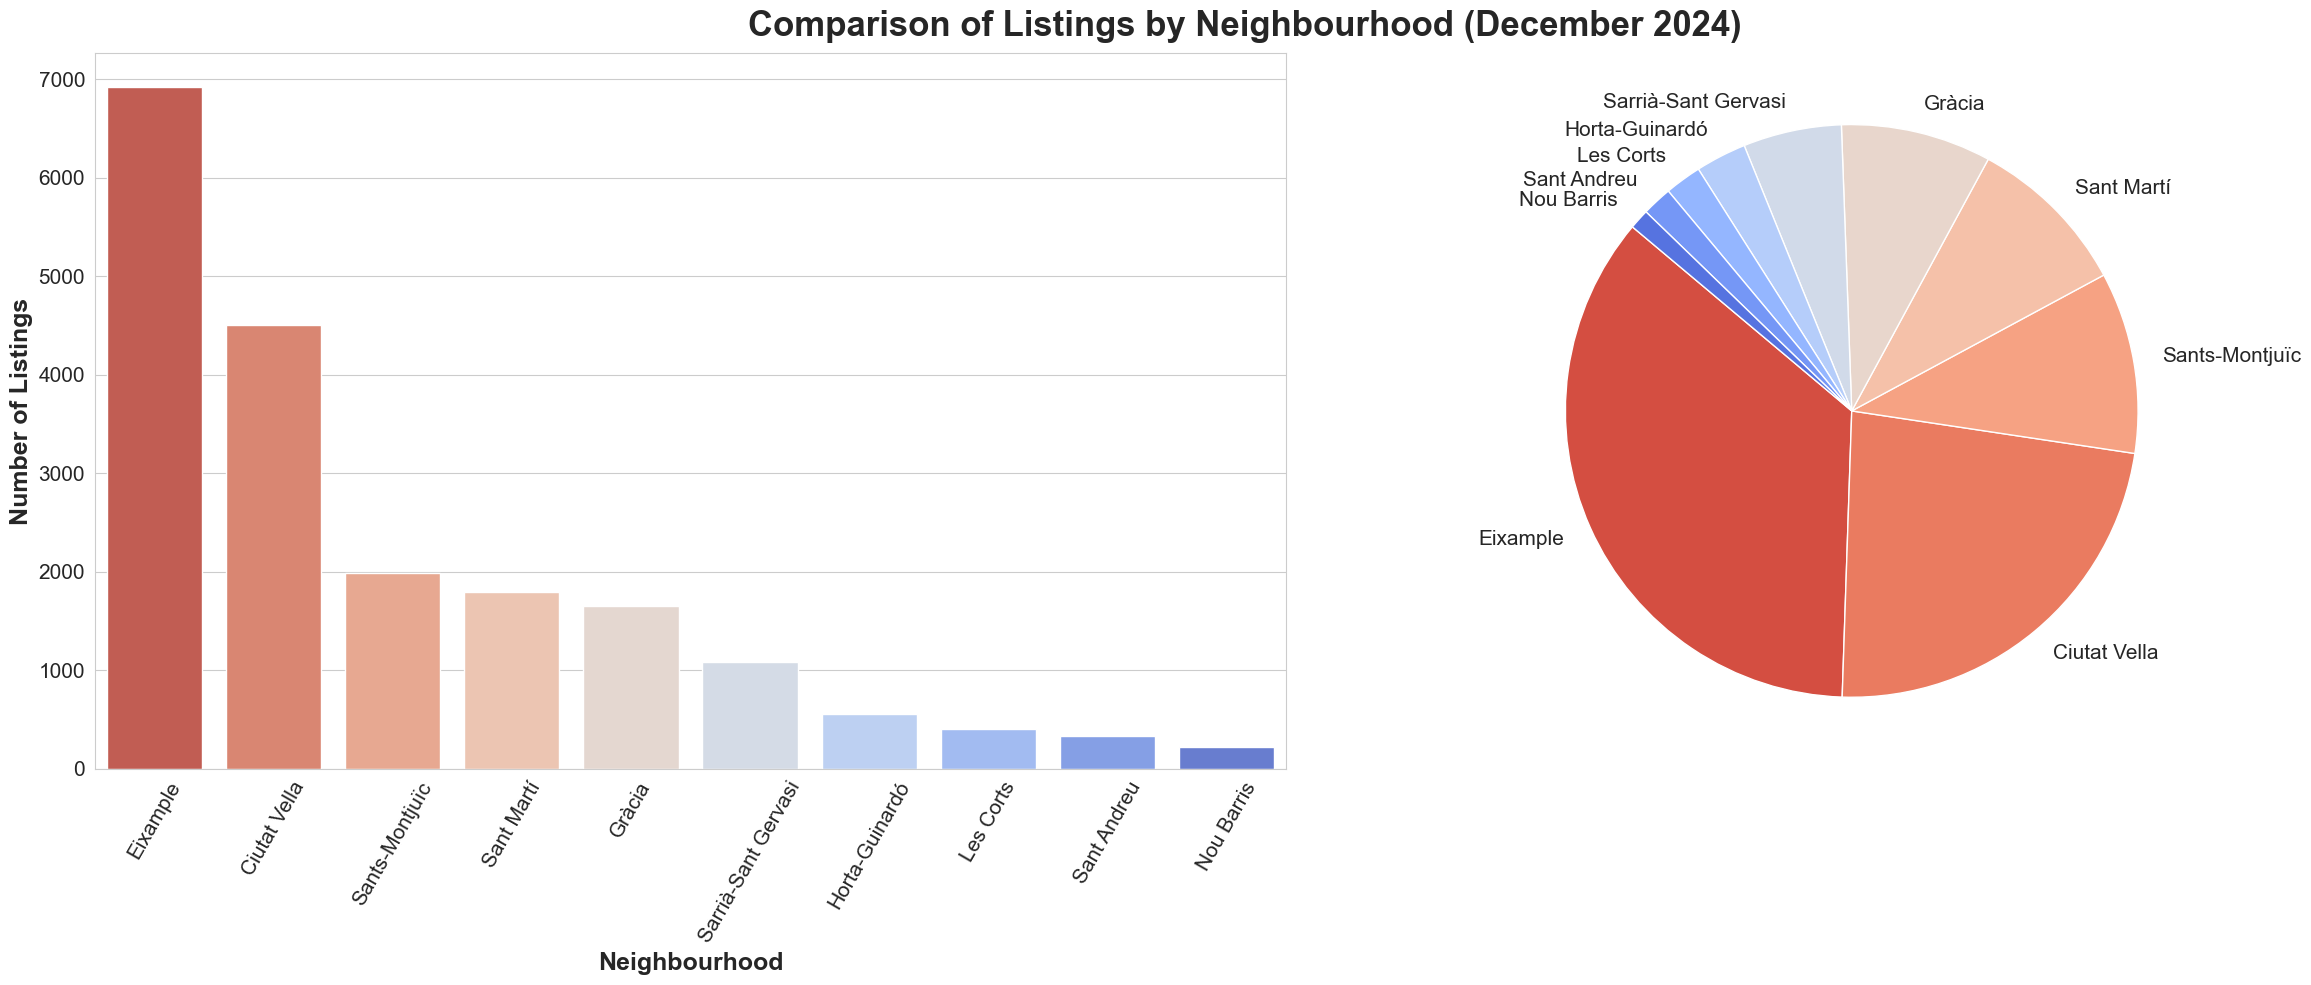

In [303]:
# Now let's do the same for December

# Count listings per neighborhood in December
neighbourhood_dec = data_dec["neighbourhood_group_cleansed"].value_counts().reset_index()
neighbourhood_dec.columns = ["neighbourhood_group_cleansed", "dec_count"]

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(25, 10))
fig.suptitle("Comparison of Listings by Neighbourhood (December 2024)", fontsize=25, fontweight="bold")
bar_colors = sns.color_palette("coolwarm_r", len(neighbourhood_dec))

# --- Bar Plot ---
sns.barplot(data=neighbourhood_dec,
            x="neighbourhood_group_cleansed", 
            y="dec_count",
            hue="neighbourhood_group_cleansed", 
            palette=bar_colors, 
            ax=axes[0])

axes[0].tick_params(axis="x", labelrotation=60, labelsize=15)
axes[0].tick_params(axis="y", labelrotation=0, labelsize=15)
axes[0].set_xlabel("Neighbourhood", fontsize=18, fontweight="bold")
axes[0].set_ylabel("Number of Listings", fontsize=18, fontweight="bold")

# --- Pie Chart ---
axes[1].pie(neighbourhood_dec["dec_count"],
            labels=neighbourhood_dec["neighbourhood_group_cleansed"], 
            startangle=140, 
            colors=bar_colors,
            textprops={'fontsize': 15},
            labeldistance=1.1, 
            pctdistance=0.85)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined plots
plt.show()

**Observations**

The distribution of AirBnb listings in December 2024 is very similar to the one we observed in March 2024.

It would be interesting to see what is the distribution of the new listings is, and if it follows the same trend.

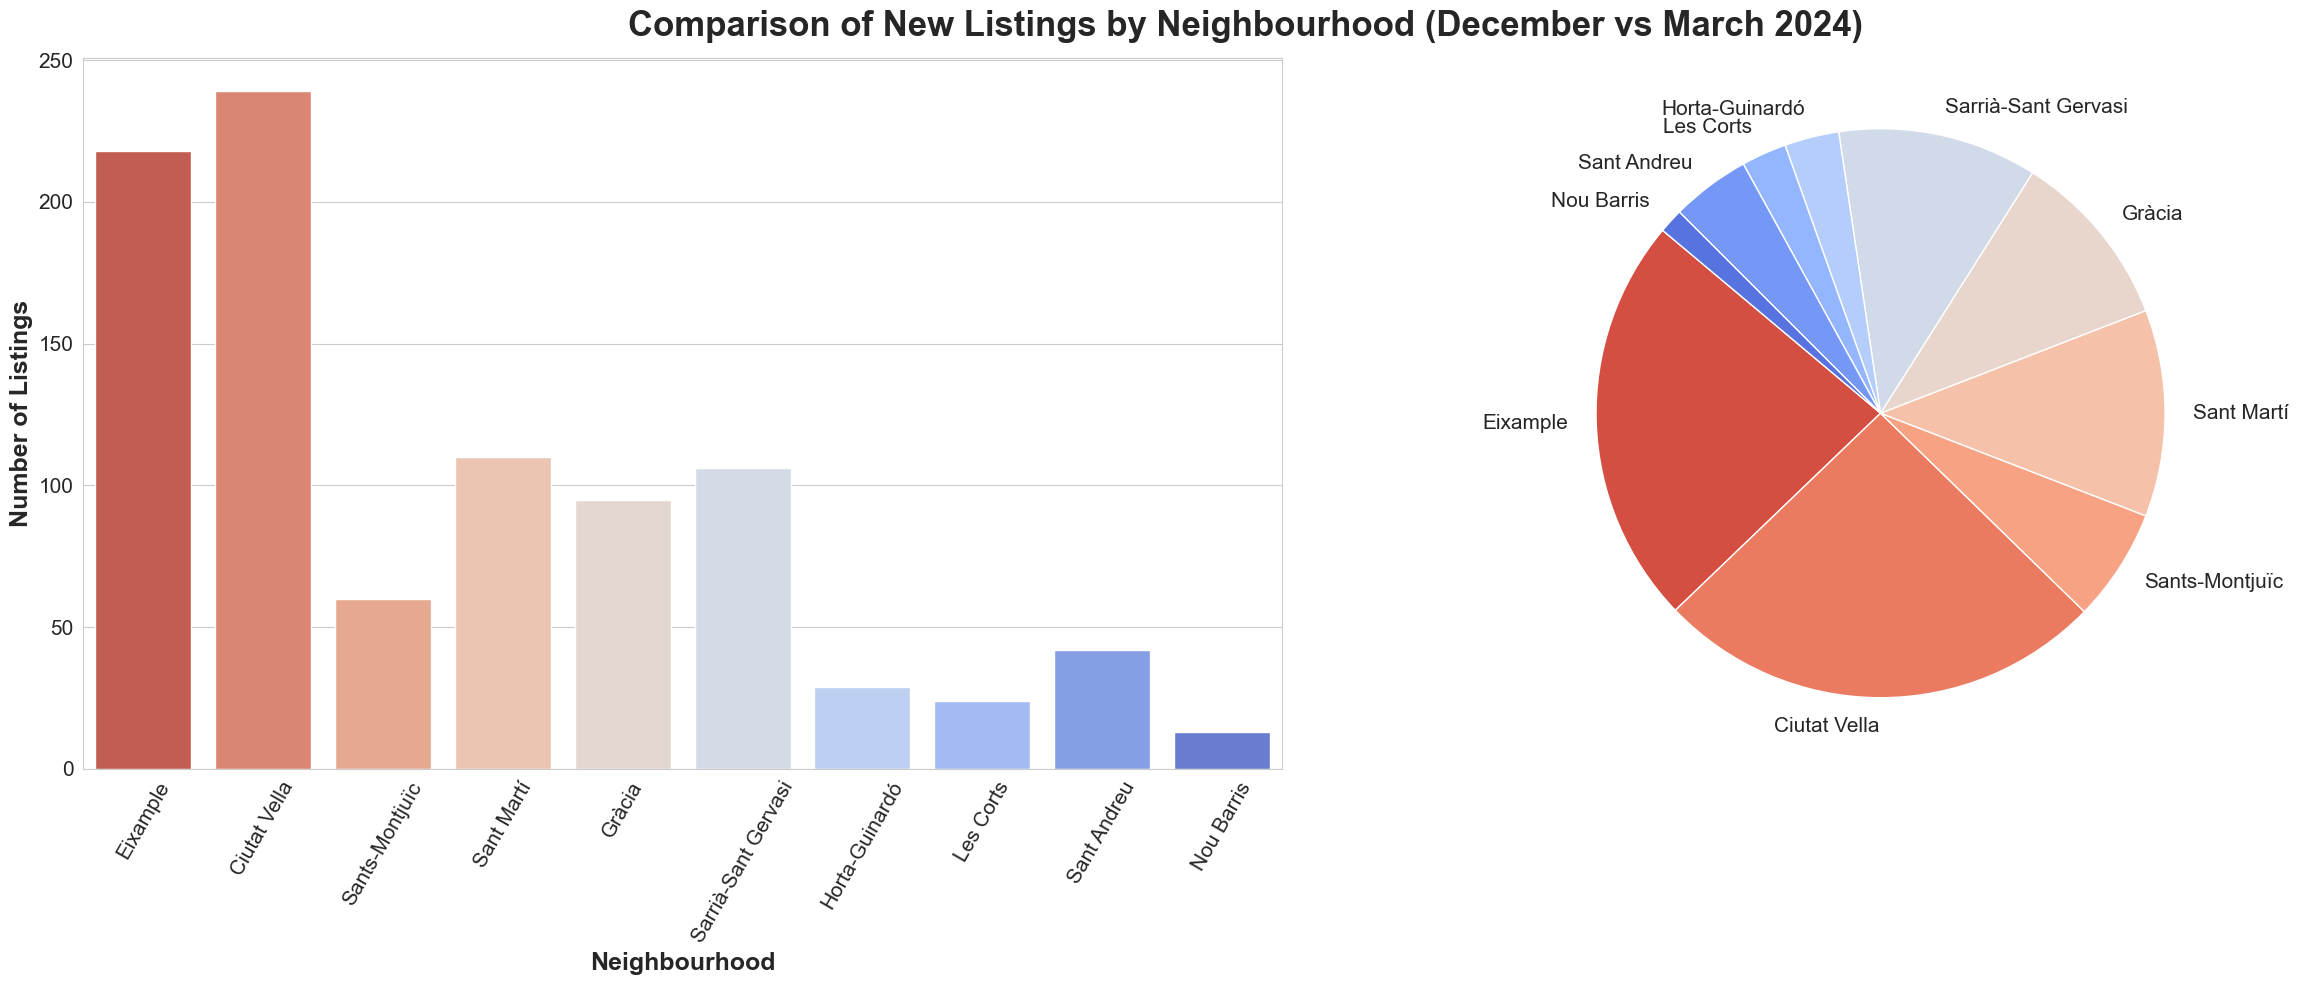

In [305]:
# Finally, let's see the distribution of only the new listings that appear in December but where not yet listed in March.

# Merge both datasets (outer join to keep all neighborhoods)
neighbourhood_counts = pd.merge(neighbourhood_dec, neighbourhood_mar, on="neighbourhood_group_cleansed", how="left").fillna(0)

# Calculate new listings in December (listings that were not in March)
neighbourhood_counts["new_listings"] = neighbourhood_counts["dec_count"] - neighbourhood_counts["march_count"]

# Keep only positive values (new listings)
neighbourhood_counts = neighbourhood_counts[neighbourhood_counts["new_listings"] > 0]

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(25, 10))
fig.suptitle("Comparison of New Listings by Neighbourhood (December vs March 2024)", fontsize=25, fontweight="bold")
bar_colors = sns.color_palette("coolwarm_r", len(neighbourhood_counts))

# --- Bar Plot ---
sns.barplot(data=neighbourhood_counts, 
            x="neighbourhood_group_cleansed", 
            hue="neighbourhood_group_cleansed",
            y="new_listings", 
            palette=bar_colors, 
            ax=axes[0])
axes[0].tick_params(axis="x", labelrotation=60, labelsize=15)
axes[0].tick_params(axis="y", labelrotation=0, labelsize=15)
axes[0].set_xlabel("Neighbourhood", fontsize=18, fontweight="bold")
axes[0].set_ylabel("Number of Listings", fontsize=18, fontweight="bold")


# --- Pie Chart ---
axes[1].pie(neighbourhood_counts["new_listings"], 
            labels=neighbourhood_counts["neighbourhood_group_cleansed"], 
            startangle=140, 
            colors=bar_colors,
            textprops={'fontsize': 15},
            labeldistance=1.1, 
            pctdistance=0.85)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined plots
plt.show()

**Observations**

While Eixaple and Ciutat Vella are still the 2 neighbourhood which concentrate the majority of new listings, we can observe how **Sant Martí, Sarrià-Sant Gervasi and Gràcia are accumulating a big number of new listings** from March to December 2024.


## 4. Increment of pricing over time

**Aim**

To check if there are any changes in the listings' price over time.

**Hypothesis**

Listing's prices are higher in December 2024 compared to March 2024.

In [ ]:
# In order to compare the prices of the same listings, we'll eventually merge the 2 datasets.
# Hence we will first create a new column in each dataset indicating wether each row comes from the March or December dataset.add

data_mar["dataset_date"] = "March 2024"
data_dec["dataset_date"] = "December 2024"

In [ ]:
# Since we have previously checked that both original datasets have the same column structure, 
# we'll append the rows from data_dec below the rows of data_mar.
# Moreover, we will create a new index so that we don't have duplicated index using gnore_index=True

data_combined = pd.concat([data_mar, data_dec], ignore_index=True)

print(f"data_mar:", data_mar.shape)
print(f"data_dec:", data_dec.shape)
print(f"data_combined:", data_combined.shape)

data_mar: (18519, 76)
data_dec: (19455, 76)
data_combined: (37974, 76)


In [187]:
# To start working with the price of the listings, we need to first convert it to a float
# We'll have to delete $, but also comas!

data_combined["price"] = data_combined["price"].str.replace("$", "").str.replace(",", "").astype(float)

In [198]:
# Since we are doing this conversion of "price" in the combined, let's also do it in the original datasets
data_dec["price"] = data_dec["price"].str.replace("$", "").str.replace(",", "").astype(float)
data_mar["price"] = data_mar["price"].str.replace("$", "").str.replace(",", "").astype(float)

Text(0.5, 1.0, 'Distribution of Listing Prices in March and December')

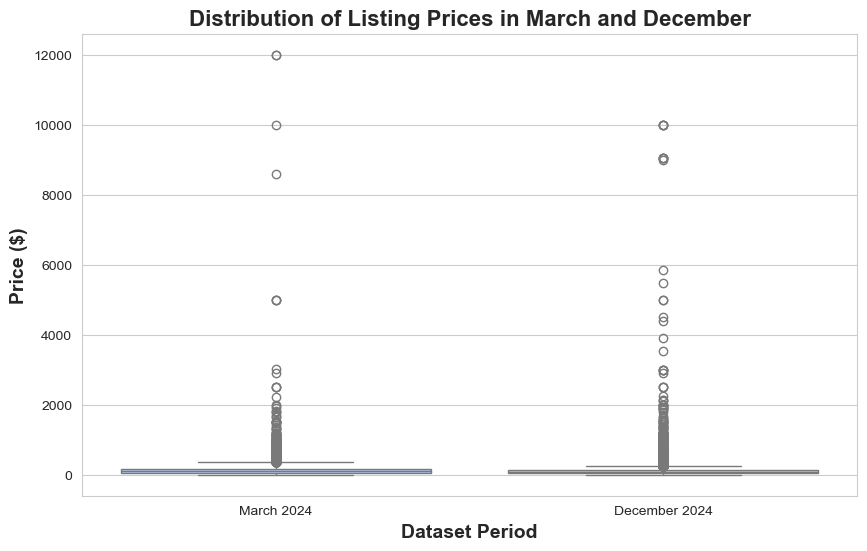

In [195]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_combined, 
            x="dataset_date",
            hue="dataset_date",
            y="price", 
            palette="coolwarm")

plt.xlabel("Dataset Period", fontsize=14, fontweight="bold")
plt.ylabel("Price ($)", fontsize=14, fontweight="bold")
plt.title("Distribution of Listing Prices in March and December", fontsize=16, fontweight="bold")

Text(0.5, 1.0, 'Distribution of Listing Prices in March and December')

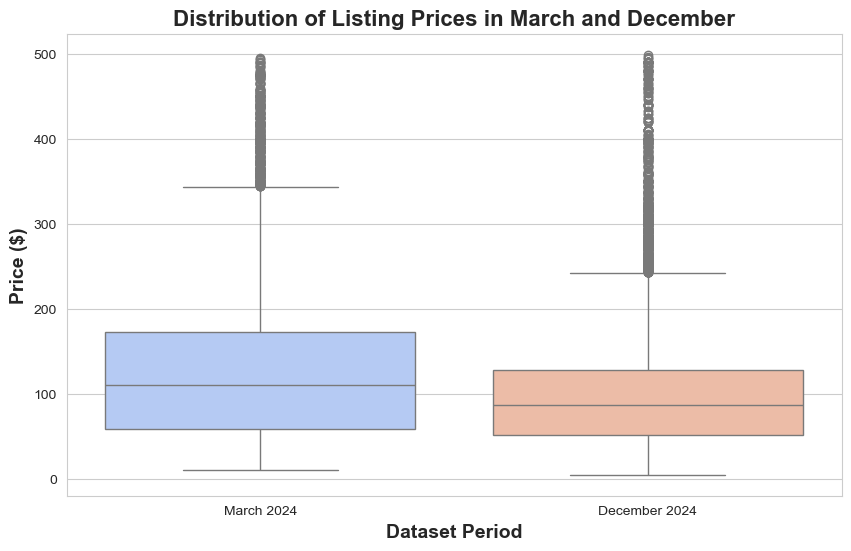

In [197]:
# Since we have extrem outliers, we cannot appreciate the rest of the data properly.
# Let's exclude them

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_combined[data_combined["price"] < 500], 
            x="dataset_date",
            hue="dataset_date",
            y="price", 
            palette="coolwarm")

plt.xlabel("Dataset Period", fontsize=14, fontweight="bold")
plt.ylabel("Price ($)", fontsize=14, fontweight="bold")
plt.title("Distribution of Listing Prices in March and December", fontsize=16, fontweight="bold")

**Observation**

There is not a clear change in the overall prices of listings.


In [276]:
# To fine-tune this comparison, let's see if the price of the same listings has changed over time.
# To do so, we'll start by selecting only the listings that we could find in both datasets.

# Get unique IDs from each dataset
ids_march = set(data_mar["id"].unique())
ids_december = set(data_dec["id"].unique())

# Find shared IDs (exist in both months)
shared_ids = ids_march.intersection(ids_december)

# Finally let's find the ones that are in one dataset but not in the other

only_in_march = ids_march - shared_ids
only_in_december = ids_december - shared_ids
not_in_common = len(only_in_march) + len(only_in_december)

print(f"IDs March: {len(ids_march)}")
print(f"IDs December: {len(ids_december)}")
print(f"Listings appearing in both March & December: {len(shared_ids)}")

print(f"Listings only in March: {len(only_in_march)}")
print(f"Listings only in December: {len(only_in_december)}")
print(f"Total listings not in common: {not_in_common}")


IDs March: 18519
IDs December: 19455
Listings appearing in both March & December: 14548
Listings only in March: 3971
Listings only in December: 4907
Total listings not in common: 8878


**Observation**

We can see that **14548** id are shared between datasets, while **8878** are not common.

Initially, we compared the number of IDs by doing a merge, and we obtained that the december dataset contained **936** new values.

This is exacte the same value we obtained at the very beggining of the EDA by doing :

  Total Listings in March: 18519

  Total Listings in December: 19455

  Increase in Listings: **936**

Therefore, it looks like we have an inconcistency. This might be due to listings present in March that were dropped and do not appear any longer in December.

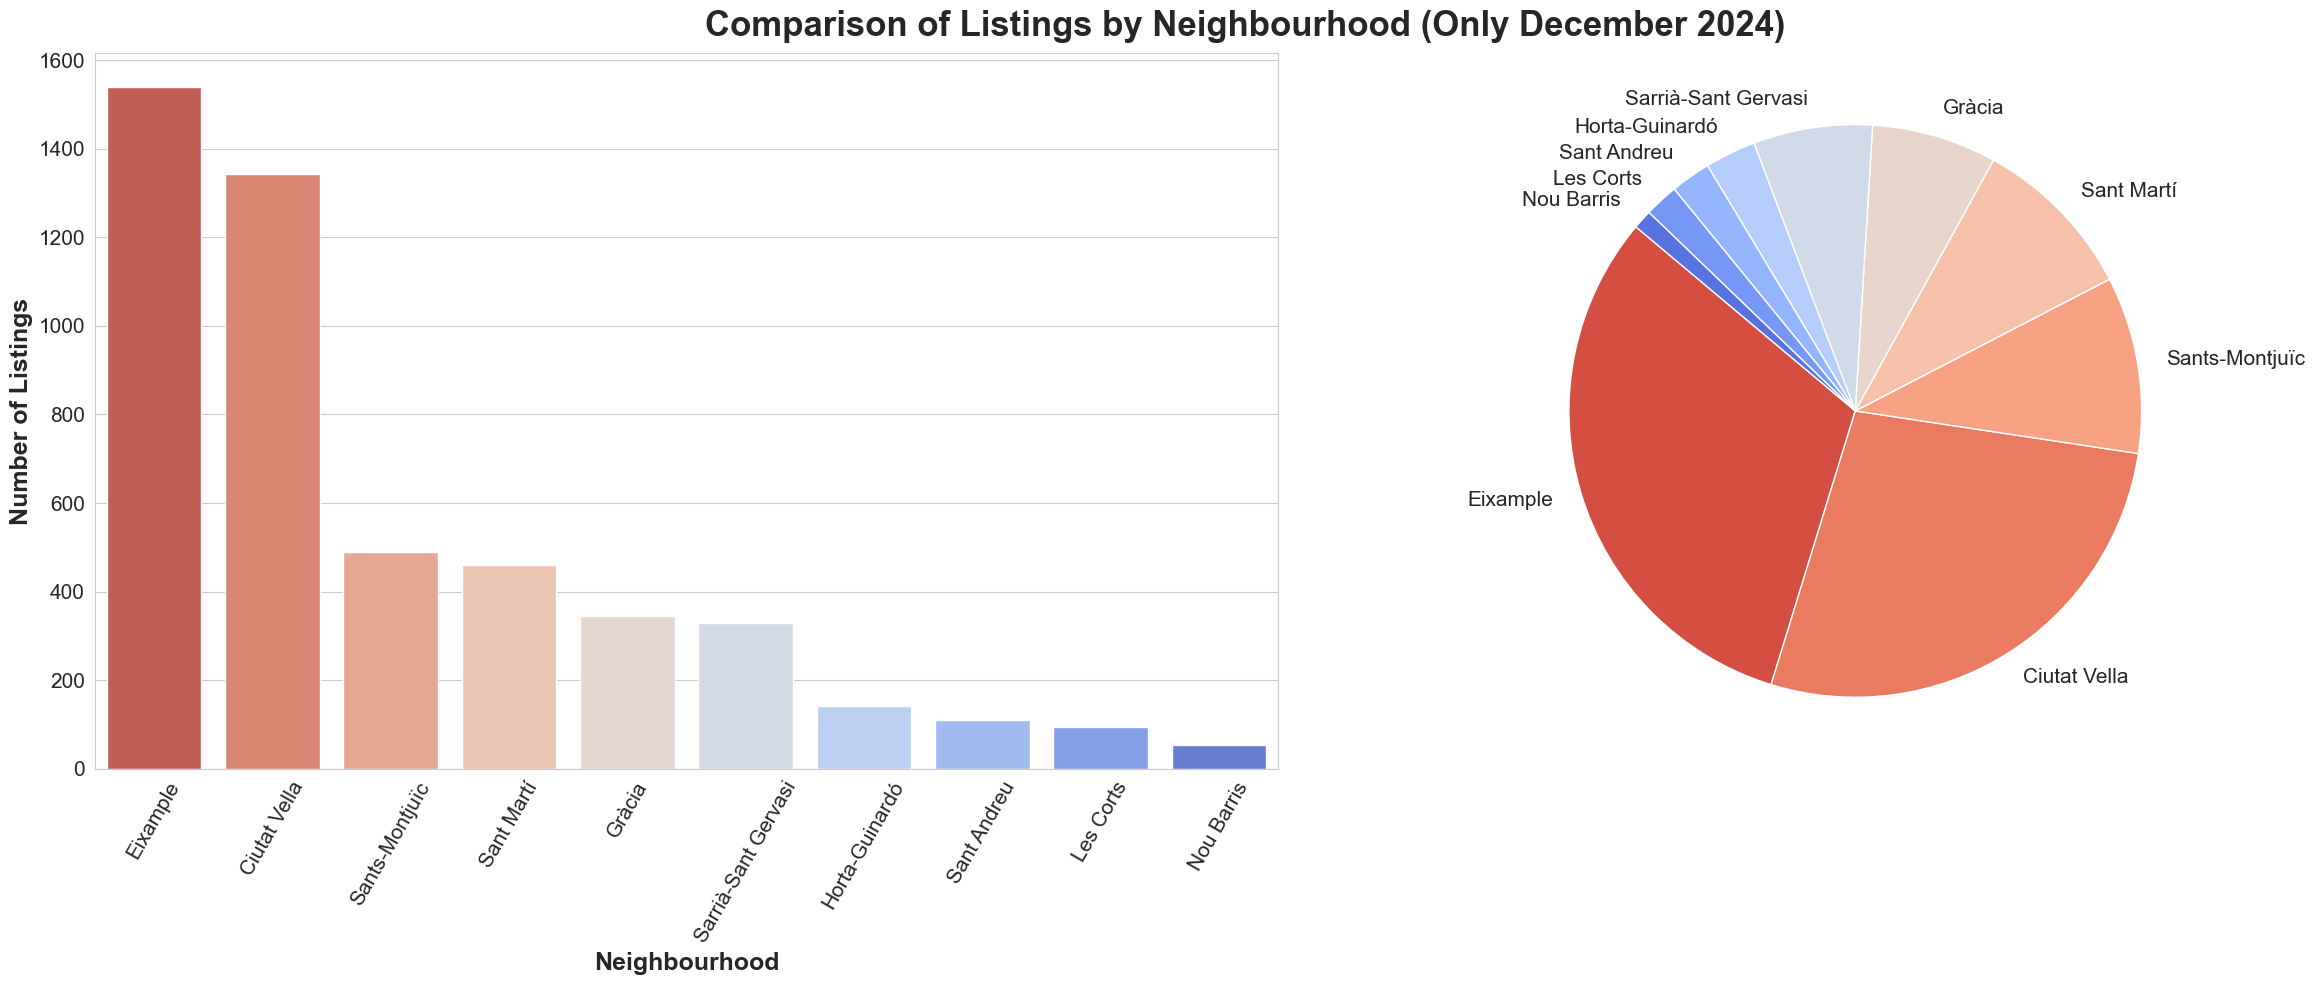

In [306]:
# Now that we have found the true ids that appeared in December, the previous plot 
# "Comparison of New Listings by Neighbourhood (December vs March 2024)" must be repeated with the proper list of ids
# of "Listings only in December: 4907"

data_only_december = data_dec[data_dec["id"].isin(only_in_december)]

# Count listings per neighborhood in "Only December""
neighbourhood_only_december = data_only_december["neighbourhood_group_cleansed"].value_counts().reset_index()
neighbourhood_only_december.columns = ["neighbourhood_group_cleansed", "only_december_count"]

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(25, 10))
fig.suptitle("Comparison of Listings by Neighbourhood (Only December 2024)", fontsize=25, fontweight="bold")
bar_colors = sns.color_palette("coolwarm_r", len(neighbourhood_only_december))

# --- Bar Plot ---
sns.barplot(data=neighbourhood_only_december,
            x="neighbourhood_group_cleansed", 
            y="only_december_count",
            hue="neighbourhood_group_cleansed", 
            palette=bar_colors, 
            ax=axes[0])

axes[0].tick_params(axis="x", labelrotation=60, labelsize=15)
axes[0].tick_params(axis="y", labelrotation=0, labelsize=15)
axes[0].set_xlabel("Neighbourhood", fontsize=18, fontweight="bold")
axes[0].set_ylabel("Number of Listings", fontsize=18, fontweight="bold")

# --- Pie Chart ---
axes[1].pie(neighbourhood_only_december["only_december_count"],
            labels=neighbourhood_only_december["neighbourhood_group_cleansed"], 
            startangle=140, 
            colors=bar_colors,
            textprops={'fontsize': 15},
            labeldistance=1.1, 
            pctdistance=0.85)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined plots
plt.show()

**Observations**

In this case, we have a much higher increase in the number of new listings in December (4907 instead of only 936). The new listings follow the same pattern of distribution between neighbourhoods, with Eixample and Ciutat Vella being the ones with more than half of them.